In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set(font_scale = 1.5)
sns.set_style("white")

### Constraint function

Currently, all constraints between agents have a binary quadratic form:
$ax^2 + bxy + cy^2$

The coefficients $a$, $b$, and $c$ are set to 1 on initialization but when a change constraint event is received, the coefficients are sampled between $[0, 1]$ for each one and kept until another constraint change event happens.

### Load data

In [18]:
d = 6
# ours
dg_ccocoa_df = pd.read_csv(f'dc-cocoa-max-deg-{d}-merged-metrics.csv')
dg_ccocoa_df2 = pd.read_csv(f'dc-cocoa-d10-max-deg-{d}-merged-metrics.csv')

dg_csdpop_df = pd.read_csv(f'dc-sdpop-max-deg-{d}-merged-metrics.csv')
dg_csdpop_df2 = pd.read_csv(f'dc-sdpop-d10-max-deg-{d}-merged-metrics.csv')
# dg_sdpop_df_d3 = pd.read_csv('../metrics/sdpop-d3Lr0.05.csv')
# dg_sdpop_df_d40 = pd.read_csv('../metrics/sdpop-d40Lr0.05.csv')
# dg_nodcop_df = pd.read_csv('../metrics/dcop-base-d3Lr0.05.csv')

# baselines
ccocoa_df = pd.read_csv(f'c-cocoa-max-deg-{d}-merged-metrics.csv')

#### data stats

In [19]:
# dg_ccocoa_df.shape, dg_csdpop_df.shape, dg_sdpop_df_d3.shape, dg_sdpop_df_d40.shape, dg_nodcop_df.shape, ccocoa_df.shape
dg_ccocoa_df.shape, dg_csdpop_df.shape, ccocoa_df.shape

((120, 29), (120, 29), (120, 7))

### chart funcs

In [20]:
def show_event_markers(axis, event_df, metric):
    for i, row in event_df.iterrows():
        if row['type'] == 'add_agent':
            ax.scatter(i, dg_ccocoa_df[metric][i], color='black', marker='o')
            ax.scatter(i, dg_csdpop_df[metric][i], color='black', marker='o')
            
            ax.scatter(i, dg_ccocoa_df_htest[metric][i], color='black', marker='o')
            ax.scatter(i, dg_csdpop_df_htest[metric][i], color='black', marker='o')
            
            if metric not in ['num_changes']:
                ax.scatter(i, ccocoa_df[metric][i], color='black', marker='o')
        elif row['type'] == 'change_constraint':
            ax.scatter(i, dg_ccocoa_df[metric][i], color='purple', marker='x')
            ax.scatter(i, dg_csdpop_df[metric][i], color='purple', marker='x')
            
            ax.scatter(i, dg_ccocoa_df_htest[metric][i], color='purple', marker='x')
            ax.scatter(i, dg_csdpop_df_htest[metric][i], color='purple', marker='x')
            
            if metric not in ['num_changes']:
                ax.scatter(i, ccocoa_df[metric][i], color='purple', marker='x')
        else:
            ax.scatter(i, dg_ccocoa_df[metric][i], color='red', marker='^')
            ax.scatter(i, dg_csdpop_df[metric][i], color='red', marker='^')
            
            ax.scatter(i, dg_ccocoa_df_htest[metric][i], color='red', marker='^')
            ax.scatter(i, dg_csdpop_df_htest[metric][i], color='red', marker='^')
            
            if metric not in ['num_changes']:
                ax.scatter(i, ccocoa_df[metric][i], color='red', marker='^')

### Solution cost

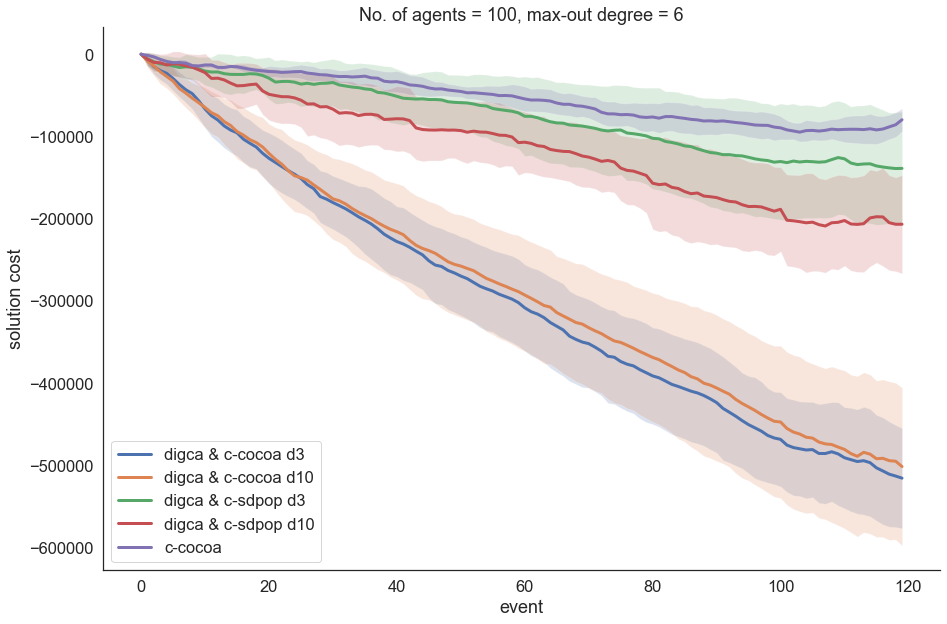

In [21]:
fig, ax = plt.subplots(figsize=(15,10))

plt.plot(dg_ccocoa_df['edge_cost'], label='digca & c-cocoa d3', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df['edge_cost'])), 
    dg_ccocoa_df['edge_cost'] - dg_ccocoa_df['edge_cost-std'], 
    dg_ccocoa_df['edge_cost'] + dg_ccocoa_df['edge_cost-std'], 
    alpha=.2
)

plt.plot(dg_ccocoa_df2['edge_cost'], label='digca & c-cocoa d10', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df2['edge_cost'])), 
    dg_ccocoa_df2['edge_cost'] - dg_ccocoa_df2['edge_cost-std'], 
    dg_ccocoa_df2['edge_cost'] + dg_ccocoa_df2['edge_cost-std'], 
    alpha=.2
)

plt.plot(dg_csdpop_df['edge_cost'], label='digca & c-sdpop d3', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_csdpop_df['edge_cost'])), 
    dg_csdpop_df['edge_cost'] - dg_csdpop_df['edge_cost-std'], 
    dg_csdpop_df['edge_cost'] + dg_csdpop_df['edge_cost-std'], 
    alpha=.2
)
plt.plot(dg_csdpop_df2['edge_cost'], label='digca & c-sdpop d10', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_csdpop_df2['edge_cost'])), 
    dg_csdpop_df2['edge_cost'] - dg_csdpop_df2['edge_cost-std'], 
    dg_csdpop_df2['edge_cost'] + dg_csdpop_df2['edge_cost-std'], 
    alpha=.2
)

# plt.plot(dg_ccocoa_df_htest['edge_cost'], label='digca & c-cocoa-htest', linewidth=3)
# plt.fill_between(
#     np.arange(0, len(dg_ccocoa_df_htest['edge_cost'])), 
#     dg_ccocoa_df_htest['edge_cost'] - dg_ccocoa_df_htest['edge_cost-std'], 
#     dg_ccocoa_df_htest['edge_cost'] + dg_ccocoa_df_htest['edge_cost-std'], 
#     alpha=.2
# )

# plt.plot(dg_csdpop_df_htest['edge_cost'], label='digca & c-sdpop-htest', linewidth=3)
# plt.fill_between(
#     np.arange(0, len(dg_csdpop_df_htest['edge_cost'])), 
#     dg_csdpop_df_htest['edge_cost'] - dg_csdpop_df_htest['edge_cost-std'], 
#     dg_csdpop_df_htest['edge_cost'] + dg_csdpop_df_htest['edge_cost-std'], 
#     alpha=.2
# )

# plt.plot(dg_csdpop_df_htest_d10['edge_cost'], label='digca & c-sdpop-htest-d10', linewidth=3)
# plt.fill_between(
#     np.arange(0, len(dg_csdpop_df_htest_d10['edge_cost'])), 
#     dg_csdpop_df_htest_d10['edge_cost'] - dg_csdpop_df_htest_d10['edge_cost-std'], 
#     dg_csdpop_df_htest_d10['edge_cost'] + dg_csdpop_df_htest_d10['edge_cost-std'], 
#     alpha=.2
# )

# plt.plot(dg_csdpop_df_all_neighbor_opt_d3['edge_cost'], label='digca & c-sdpop-all-neigh-opt', linewidth=3)
# plt.fill_between(
#     np.arange(0, len(dg_csdpop_df_all_neighbor_opt_d3['edge_cost'])), 
#     dg_csdpop_df_all_neighbor_opt_d3['edge_cost'] - dg_csdpop_df_all_neighbor_opt_d3['edge_cost-std'], 
#     dg_csdpop_df_all_neighbor_opt_d3['edge_cost'] + dg_csdpop_df_all_neighbor_opt_d3['edge_cost-std'], 
#     alpha=.2
# )

plt.plot(ccocoa_df['edge_cost'], label='c-cocoa', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df['edge_cost'])), 
    ccocoa_df['edge_cost'] - ccocoa_df['edge_cost-std'], 
    ccocoa_df['edge_cost'] + ccocoa_df['edge_cost-std'], 
    alpha=.2
)

plt.ylabel('solution cost')
plt.xlabel('event')
plt.legend()
plt.title(f'No. of agents = 100, max-out degree = {d}')
# show_event_markers(ax, dg_ccocoa_df, metric='edge_cost')
sns.despine(offset=0)
# plt.show()
plt.savefig(f'costs_d{d}.pdf')

### Messages

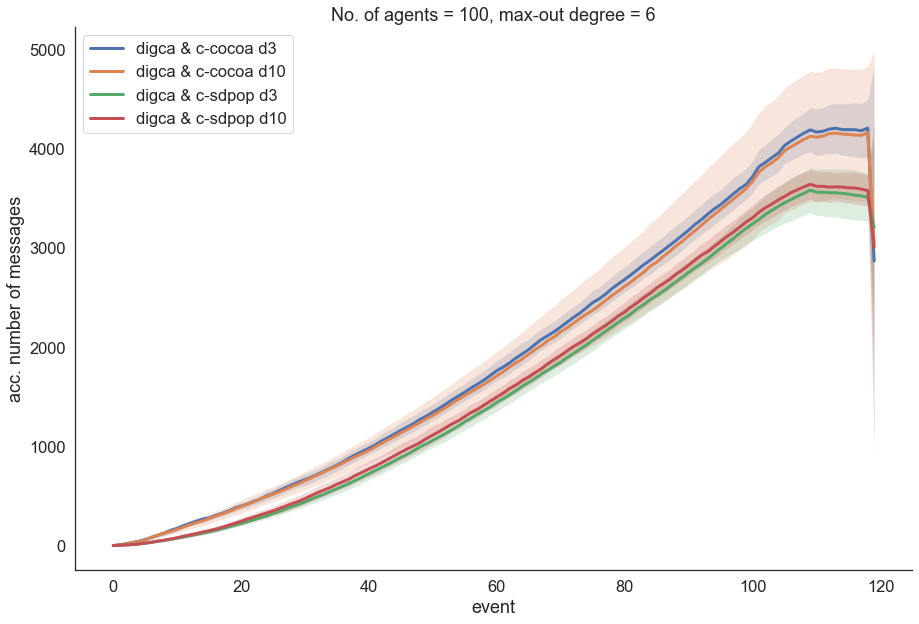

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(dg_ccocoa_df['message_count'], label='digca & c-cocoa d3', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df['message_count'])), 
    dg_ccocoa_df['message_count'] - dg_ccocoa_df['message_count-std'], 
    dg_ccocoa_df['message_count'] + dg_ccocoa_df['message_count-std'], 
    alpha=.2
)
plt.plot(dg_ccocoa_df2['message_count'], label='digca & c-cocoa d10', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df2['message_count'])), 
    dg_ccocoa_df2['message_count'] - dg_ccocoa_df2['message_count-std'], 
    dg_ccocoa_df2['message_count'] + dg_ccocoa_df2['message_count-std'], 
    alpha=.2
)

plt.plot(dg_csdpop_df['message_count'], label='digca & c-sdpop d3', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_csdpop_df['message_count'])), 
    dg_csdpop_df['message_count'] - dg_csdpop_df['message_count-std'], 
    dg_csdpop_df['message_count'] + dg_csdpop_df['message_count-std'], 
    alpha=.2
)
plt.plot(dg_csdpop_df2['message_count'], label='digca & c-sdpop d10', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_csdpop_df2['message_count'])), 
    dg_csdpop_df2['message_count'] - dg_csdpop_df2['message_count-std'], 
    dg_csdpop_df2['message_count'] + dg_csdpop_df2['message_count-std'], 
    alpha=.2
)

# plt.plot(dg_csdpop_df['message_count'], label='dynagraph & c-sdpop')
# plt.plot(dg_sdpop_df['message_count'], label='dynagraph & sdpop')
# plt.plot(dg_nodcop_df['message_count'], label='dynagraph')

# plt.plot(ccocoa_df['message_count'], label='c-cocoa', linewidth=3)
# plt.fill_between(
#     np.arange(0, len(dg_ccocoa_df['message_count'])), 
#     ccocoa_df['message_count'] - ccocoa_df['message_count-std'], 
#     ccocoa_df['message_count'] + ccocoa_df['message_count-std'], 
#     alpha=.2
# )

plt.ylabel('acc. number of messages')
plt.xlabel('event')
plt.legend()
plt.title(f'No. of agents = 100, max-out degree = {d}')
# show_event_markers(ax, dg_ccocoa_df, metric='message_count')
sns.despine(offset=0)
# plt.show()
plt.savefig(f'messages_d{d}.pdf')

### $\Delta$-Changes

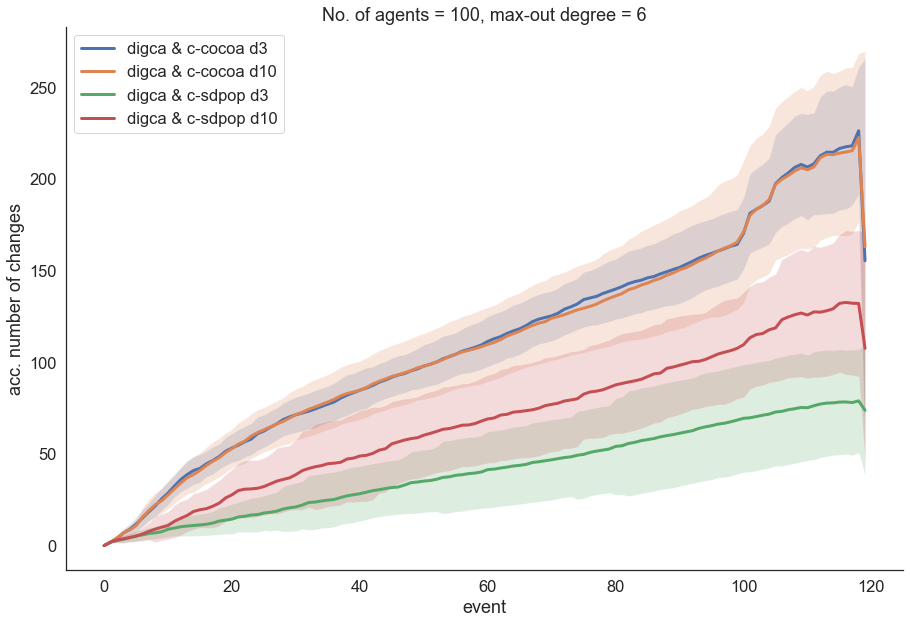

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(dg_ccocoa_df['num_changes'], label='digca & c-cocoa d3', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df['num_changes'])), 
    dg_ccocoa_df['num_changes'] - dg_ccocoa_df['num_changes-std'], 
    dg_ccocoa_df['num_changes'] + dg_ccocoa_df['num_changes-std'], 
    alpha=.2
)
plt.plot(dg_ccocoa_df2['num_changes'], label='digca & c-cocoa d10', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df2['num_changes'])), 
    dg_ccocoa_df2['num_changes'] - dg_ccocoa_df2['num_changes-std'], 
    dg_ccocoa_df2['num_changes'] + dg_ccocoa_df2['num_changes-std'], 
    alpha=.2
)

plt.plot(dg_csdpop_df['num_changes'], label='digca & c-sdpop d3', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_csdpop_df['num_changes'])), 
    dg_csdpop_df['num_changes'] - dg_csdpop_df['num_changes-std'], 
    dg_csdpop_df['num_changes'] + dg_csdpop_df['num_changes-std'], 
    alpha=.2
)
plt.plot(dg_csdpop_df2['num_changes'], label='digca & c-sdpop d10', linewidth=3)
plt.fill_between(
    np.arange(0, len(dg_csdpop_df2['num_changes'])), 
    dg_csdpop_df2['num_changes'] - dg_csdpop_df2['num_changes-std'], 
    dg_csdpop_df2['num_changes'] + dg_csdpop_df2['num_changes-std'], 
    alpha=.2
)

# plt.plot(dg_csdpop_df['message_count'], label='dynagraph & c-sdpop')
# plt.plot(dg_sdpop_df['message_count'], label='dynagraph & sdpop')
# plt.plot(dg_nodcop_df['message_count'], label='dynagraph')

plt.ylabel('acc. number of changes')
plt.xlabel('event')
plt.legend()
plt.title(f'No. of agents = 100, max-out degree = {d}')
# show_event_markers(ax, dg_ccocoa_df, metric='num_changes')
sns.despine(offset=0)
# plt.show()
plt.savefig(f'num_changes_d{d}.pdf')